## Modeling

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make sure to install lightgbm and xgboost prior to running
# !pip install lightgbm
# !pip install xgboost

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # Keep the previous one for reference if needed

# Advanced Models
import lightgbm as lgb
import xgboost as xgb

# Store the results
model_results = {}

In [3]:
# 1. Load Cleaned Data
try:
    clean_train_df = pd.read_csv("../Data/clean_train.csv")
    print("Cleaned training data loaded successfully.")
    print("Data Shape:", clean_train_df.shape)
except FileNotFoundError:
    print("Error: Cleaned data file (clean_train.csv) not found in 'Data/' directory.")
    exit()

Cleaned training data loaded successfully.
Data Shape: (750000, 12)


In [4]:
# 2. Feature Selection & Preprocessing Setup 
label_col = 'Listening_Time_minutes'
numerical_features = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
categorical_features = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop', # Drop columns not specified (e.g., id, Podcast_Name, Episode_Title)
    verbose_feature_names_out=False # Add this line to simplify output feature names
)

# Set output to pandas DataFrame to preserve feature names after transformation
preprocessor.set_output(transform="pandas")

print("Preprocessor setup complete.")

Preprocessor setup complete.


In [5]:
# 3. Data Splitting
X = clean_train_df.drop(label_col, axis=1)
y = clean_train_df[label_col]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split complete:")
print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set shape: X={X_val.shape}, y={y_val.shape}")

Data split complete:
Training set shape: X=(600000, 11), y=(600000,)
Validation set shape: X=(150000, 11), y=(150000,)


In [6]:
# 4.1 Training and Evaluate: Linear Regression (Baseline)
print("--- Linear Regression (Baseline) ---")
model_name = "Linear Regression"
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

print(f"\nTraining {model_name} model...")
lr_pipeline.fit(X_train, y_train)
print(f"{model_name} model training complete.")

print(f"Making predictions with {model_name} on the validation set...")
y_pred_lr = lr_pipeline.predict(X_val)
print(f"{model_name} predictions made.")

# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)
model_results[model_name] = {'RMSE': rmse_lr, 'MAE': mae_lr, 'R2': r2_lr}

print(f"{model_name} - RMSE: {rmse_lr:.4f}, MAE: {mae_lr:.4f}, R2: {r2_lr:.4f}")
print("First 5 predictions:", y_pred_lr[:5])
print("First 5 actual values:", y_val.values[:5])

--- Linear Regression (Baseline) ---

Training Linear Regression model...
Linear Regression model training complete.
Making predictions with Linear Regression on the validation set...
Linear Regression predictions made.
Linear Regression - RMSE: 13.3464, MAE: 9.7720, R2: 0.7579
First 5 predictions: [31.03515625 34.81835938 37.48632812 45.27539062 48.9921875 ]
First 5 actual values: [20.91979 42.66054 43.30069 48.56    48.53842]


In [7]:
# 4.2 Training and Evaluate: KNN
print("--- K-Nearest Neighbors ---")
model_name = "K-Nearest Neighbors"
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor(n_neighbors=5))])

print(f"\nTraining {model_name} model...")
knn_pipeline.fit(X_train, y_train)
print(f"{model_name} model training complete.")

print(f"Making predictions with {model_name} on the validation set...")
print(f"This may take a while")
y_pred_knn = knn_pipeline.predict(X_val)
print(f"{model_name} predictions made.")

# Evaluation
rmse_knn = np.sqrt(mean_squared_error(y_val, y_pred_knn))
mae_knn = mean_absolute_error(y_val, y_pred_knn)
r2_knn = r2_score(y_val, y_pred_knn)
model_results[model_name] = {'RMSE': rmse_knn, 'MAE': mae_knn, 'R2': r2_knn}

print(f"{model_name} - RMSE: {rmse_knn:.4f}, MAE: {mae_knn:.4f}, R2: {r2_knn:.4f}")
print("First 5 predictions:", y_pred_knn[:5])
print("First 5 actual values:", y_val.values[:5])

--- K-Nearest Neighbors ---

Training K-Nearest Neighbors model...
K-Nearest Neighbors model training complete.
Making predictions with K-Nearest Neighbors on the validation set...


C:\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

K-Nearest Neighbors predictions made.
K-Nearest Neighbors - RMSE: 14.9385, MAE: 11.1172, R2: 0.6967
First 5 predictions: [34.874746 31.652956 33.472114 55.374018 34.952104]
First 5 actual values: [20.91979 42.66054 43.30069 48.56    48.53842]


In [8]:
# 4.3 Training and Evaluate: Decision Tree
print("--- Decision Tree ---")
model_name = "Decision Tree"
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=10))])

print(f"\nTraining {model_name} model...")
dt_pipeline.fit(X_train, y_train)
print(f"{model_name} model training complete.")

print(f"Making predictions with {model_name} on the validation set...")
y_pred_dt = dt_pipeline.predict(X_val)
print(f"{model_name} predictions made.")

# Evaluation
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
mae_dt = mean_absolute_error(y_val, y_pred_dt)
r2_dt = r2_score(y_val, y_pred_dt)
model_results[model_name] = {'RMSE': rmse_dt, 'MAE': mae_dt, 'R2': r2_dt}

print(f"{model_name} - RMSE: {rmse_dt:.4f}, MAE: {mae_dt:.4f}, R2: {r2_dt:.4f}")
print("First 5 predictions:", y_pred_dt[:5])
print("First 5 actual values:", y_val.values[:5])

--- Decision Tree ---

Training Decision Tree model...
Decision Tree model training complete.
Making predictions with Decision Tree on the validation set...
Decision Tree predictions made.
Decision Tree - RMSE: 13.1511, MAE: 9.5660, R2: 0.7650
First 5 predictions: [31.93676188 33.39741327 35.54146163 44.14673446 45.19665514]
First 5 actual values: [20.91979 42.66054 43.30069 48.56    48.53842]


In [9]:
# 4.4 Training and Evaluate: Random Forest Regressor
print("--- Random Forest Regressor ---")
model_name = "Random Forest"

# Note: The hyperparameters (n_estimators, max_depth, min_samples_split) 
# are simplified for quick execution. You may need to tune these for the full dataset.
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42, n_estimators=10, max_depth=10, min_samples_split=10, n_jobs=-1))])

print(f"\nTraining {model_name} model...")
rf_pipeline.fit(X_train, y_train)
print(f"{model_name} model training complete.")

print(f"Making predictions with {model_name} on the validation set...")
y_pred_rf = rf_pipeline.predict(X_val)
print(f"{model_name} predictions made.")

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
model_results[model_name] = {'RMSE': rmse_rf, 'MAE': mae_rf, 'R2': r2_rf}

print(f"{model_name} - RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R2: {r2_rf:.4f}")
print("First 5 predictions:", y_pred_rf[:5])
print("First 5 actual values:", y_val.values[:5])

--- Random Forest Regressor ---

Training Random Forest model...
Random Forest model training complete.
Making predictions with Random Forest on the validation set...
Random Forest predictions made.
Random Forest - RMSE: 13.0968, MAE: 9.5271, R2: 0.7669
First 5 predictions: [32.24764184 34.37715991 36.71673862 44.02843568 45.64633796]
First 5 actual values: [20.91979 42.66054 43.30069 48.56    48.53842]


In [10]:
# 4.5 Training and Evaluate: LightGBM
print("--- LightGBM ---")
model_name = "LightGBM"
try:
    import lightgbm as lgb
    lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', lgb.LGBMRegressor(random_state=42))])

    print(f"\nTraining {model_name} model...")
    lgbm_pipeline.fit(X_train, y_train)
    print(f"{model_name} model training complete.")

    print(f"Making predictions with {model_name} on the validation set...")
    y_pred_lgbm = lgbm_pipeline.predict(X_val)
    print(f"{model_name} predictions made.")

    # Evaluation
    rmse_lgbm = np.sqrt(mean_squared_error(y_val, y_pred_lgbm))
    mae_lgbm = mean_absolute_error(y_val, y_pred_lgbm)
    r2_lgbm = r2_score(y_val, y_pred_lgbm)
    model_results[model_name] = {'RMSE': rmse_lgbm, 'MAE': mae_lgbm, 'R2': r2_lgbm}

    print(f"{model_name} - RMSE: {rmse_lgbm:.4f}, MAE: {mae_lgbm:.4f}, R2: {r2_lgbm:.4f}")
    print("First 5 predictions:", y_pred_lgbm[:5])
    print("First 5 actual values:", y_val.values[:5])

except ImportError:
    print("LightGBM is not installed (pip install lightgbm).")
except Exception as e:
    print(f"Error occurred while training or predicting LightGBM: {e}")

--- LightGBM ---

Training LightGBM model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 28
[LightGBM] [Info] Start training from score 45.447808
LightGBM model training complete.
Making predictions with LightGBM on the validation set...
LightGBM predictions made.
LightGBM - RMSE: 13.0734, MAE: 9.5280, R2: 0.7677
First 5 predictions: [32.07823933 33.26494863 36.52686242 45.82506352 48.09440818]
First 5 actual values: [20.91979 42.66054 43.30069 48.56    48.53842]


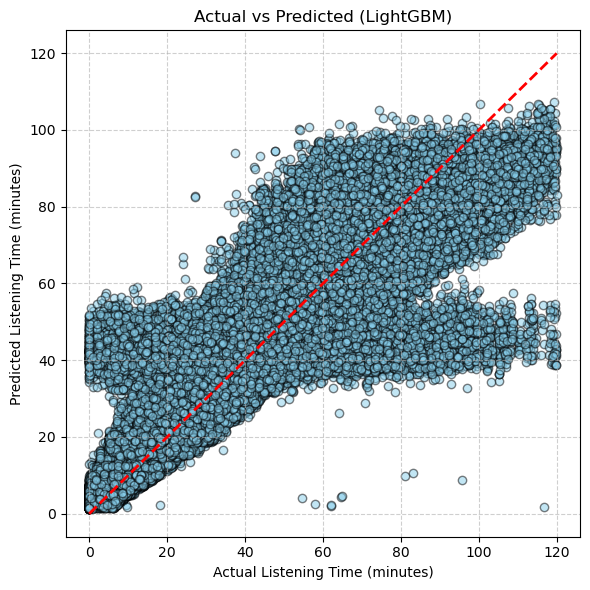

In [11]:
import matplotlib.pyplot as plt

# Plot LightGBM actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_lgbm, alpha=0.5, color='skyblue', edgecolors='k')
plt.title('Actual vs Predicted (LightGBM)')
plt.xlabel('Actual Listening Time (minutes)')
plt.ylabel('Predicted Listening Time (minutes)')

# Diagonal reference line
min_val = min(y_val.min(), y_pred_lgbm.min())
max_val = max(y_val.max(), y_pred_lgbm.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [12]:
# 4.6 Training and Evaluate: XGBoost
print("--- XGBoost ---")
model_name = "XGBoost"
try:
    import xgboost as xgb
    xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', xgb.XGBRegressor(random_state=42))])

    print(f"\nTraining {model_name} model...")
    xgb_pipeline.fit(X_train, y_train)
    print(f"{model_name} model training complete.")

    print(f"Making predictions with {model_name} on the validation set...")
    y_pred_xgb = xgb_pipeline.predict(X_val)
    print(f"{model_name} predictions made.")

    # Evaluation
    rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
    mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
    r2_xgb = r2_score(y_val, y_pred_xgb)
    model_results[model_name] = {'RMSE': rmse_xgb, 'MAE': mae_xgb, 'R2': r2_xgb}

    print(f"{model_name} - RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R2: {r2_xgb:.4f}")
    print("First 5 predictions:", y_pred_xgb[:5])
    print("First 5 actual values:", y_val.values[:5])

except ImportError:
    print("XGBoost is not installed (pip install lightgbm).")
except Exception as e:
    print(f"Error occurred while training or predicting XGBoost: {e}")

--- XGBoost ---

Training XGBoost model...
XGBoost model training complete.
Making predictions with XGBoost on the validation set...
XGBoost predictions made.
XGBoost - RMSE: 13.0289, MAE: 9.4670, R2: 0.7693
First 5 predictions: [31.53025  33.339893 35.605392 48.270626 44.870007]
First 5 actual values: [20.91979 42.66054 43.30069 48.56    48.53842]


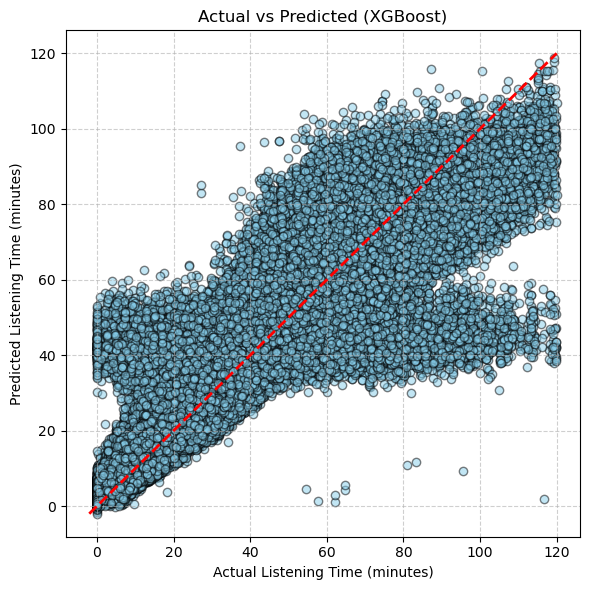

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_xgb, alpha=0.5, color='skyblue', edgecolors='k')
plt.title('Actual vs Predicted (XGBoost)')
plt.xlabel('Actual Listening Time (minutes)')
plt.ylabel('Predicted Listening Time (minutes)')

# Diagonal reference line
min_val = min(y_val.min(), y_pred_xgb.min())
max_val = max(y_val.max(), y_pred_xgb.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

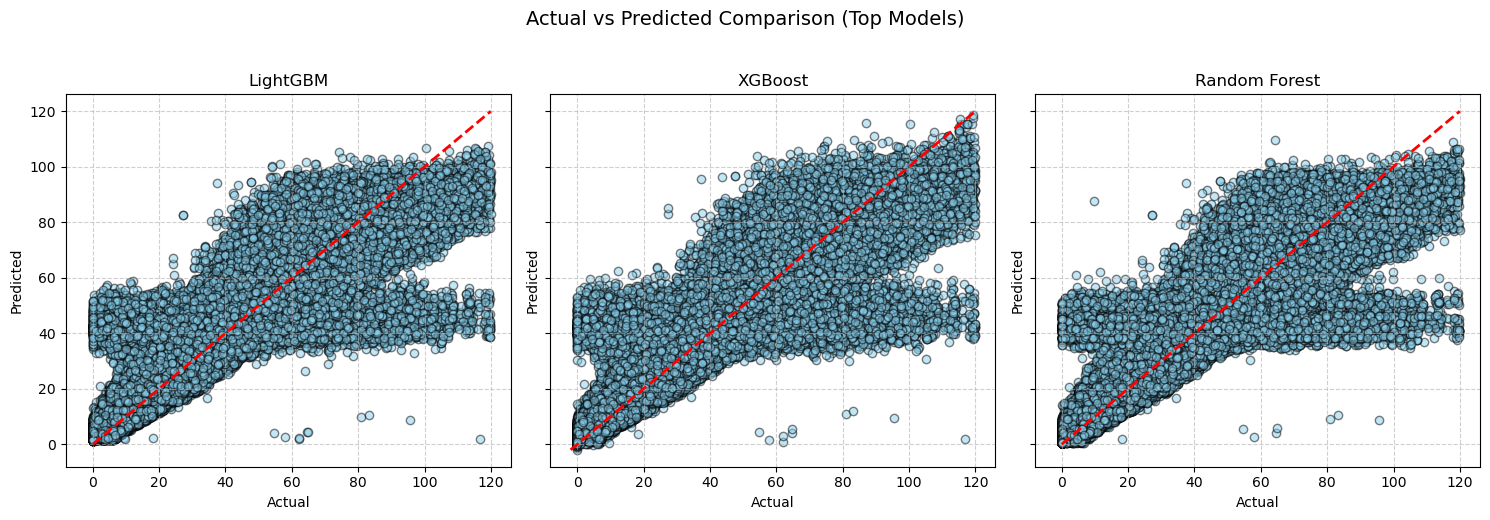

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)
models = {
    'LightGBM': y_pred_lgbm,
    'XGBoost': y_pred_xgb,
    'Random Forest': y_pred_rf
}

for ax, (name, preds) in zip(axes, models.items()):
    ax.scatter(y_val, preds, alpha=0.5, color='skyblue', edgecolors='k')
    min_val = min(y_val.min(), preds.min())
    max_val = max(y_val.max(), preds.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Actual vs Predicted Comparison (Top Models)', fontsize=14, y=1.03)
plt.tight_layout()
plt.show()

--- Display Results Summary ---
                          RMSE        MAE        R2
XGBoost              13.028861   9.467030  0.769306
LightGBM             13.073431   9.527965  0.767725
Random Forest        13.096818   9.527082  0.766893
Decision Tree        13.151126   9.566023  0.764956
Linear Regression    13.346386   9.772013  0.757924
K-Nearest Neighbors  14.938509  11.117177  0.696724


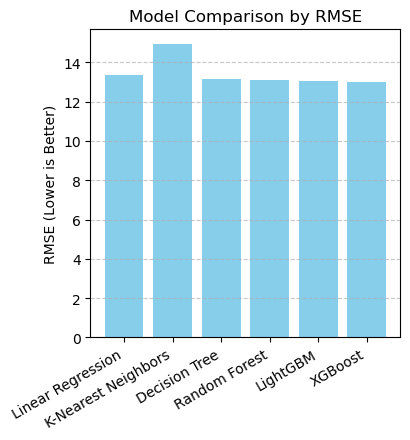

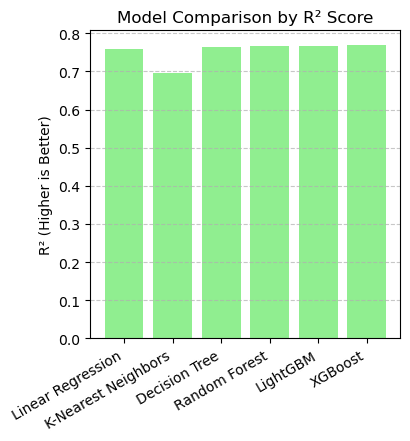

In [15]:
# --- Bar Chart of RMSE ---
import matplotlib.pyplot as plt

trained_models = {
    'LightGBM': lgb,
    'XGBoost': xgb
}

# 5. Display Results Summary
print("--- Display Results Summary ---")
if model_results:
    results_df = pd.DataFrame(model_results).T # Transpose DataFrame to make model names the index
    print(results_df.sort_values(by='RMSE')) # Sorted by RMSE
else:
    print("No model results are available. Please run the model training cell first.")

plt.figure(figsize=(4,4))
plt.bar(results_df.index, results_df['RMSE'], color='skyblue')
plt.title('Model Comparison by RMSE')
plt.ylabel('RMSE (Lower is Better)')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Optional: Bar Chart of R² ---
plt.figure(figsize=(4,4))
plt.bar(results_df.index, results_df['R2'], color='lightgreen')
plt.title('Model Comparison by R² Score')
plt.ylabel('R² (Higher is Better)')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

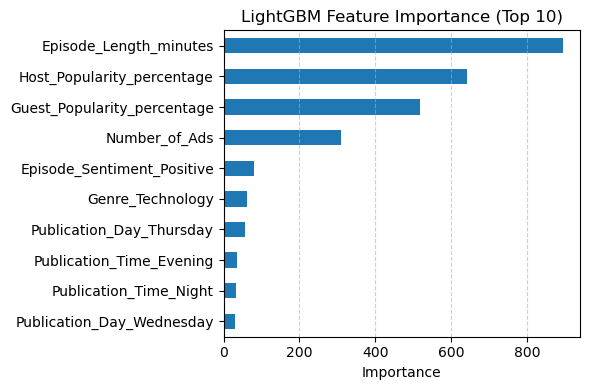

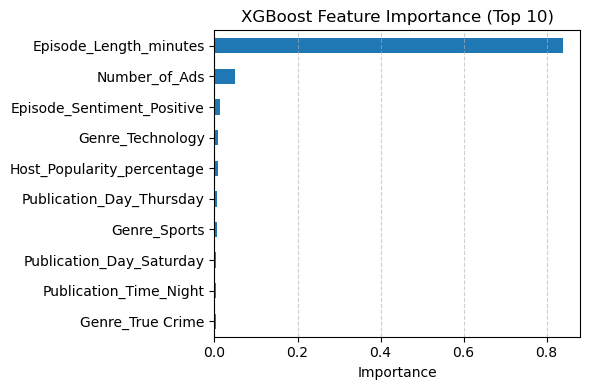

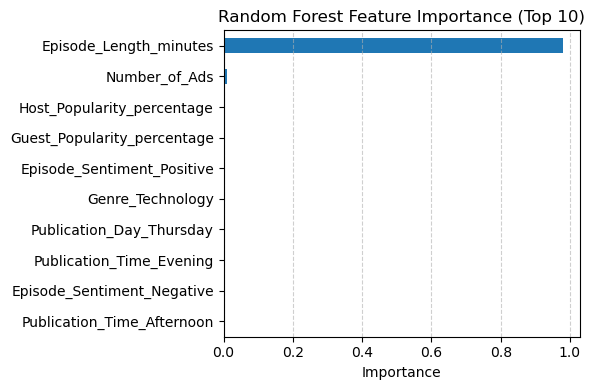

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def get_feature_names_from_ct(ct: ColumnTransformer):
    """
    Return full list of feature names from a fitted ColumnTransformer,
    expanding OneHotEncoder columns with their output names.
    """
    feature_names = []
    for name, trans, cols in ct.transformers_:
        if name == 'remainder':
            # passthrough columns (if any)
            if trans == 'passthrough':
                if isinstance(cols, slice):
                    raise ValueError("Slice columns not supported here.")
                feature_names.extend(list(cols))
            continue

        # Unwrap pipeline if present
        if isinstance(trans, Pipeline):
            # Try to find a OneHotEncoder step by name or type
            ohe = None
            for step_name, step in trans.named_steps.items():
                if isinstance(step, OneHotEncoder):
                    ohe = step
            if ohe is not None:
                # Expand OHE feature names
                ohe_names = ohe.get_feature_names_out(cols)
                feature_names.extend(list(ohe_names))
            else:
                # If no OHE in this pipeline, just append original col names
                feature_names.extend(list(cols))
        else:
            # Transformer is not a pipeline
            if isinstance(trans, OneHotEncoder):
                ohe_names = trans.get_feature_names_out(cols)
                feature_names.extend(list(ohe_names))
            elif trans == 'passthrough':
                feature_names.extend(list(cols))
            else:
                # scaler or other transformer: keep original names
                feature_names.extend(list(cols))
    return np.array(feature_names)

def plot_feature_importance_from_pipeline(pipeline, preprocessor, title="Feature Importance (Top 20)"):
    """
    For a fitted pipeline of the form: Pipeline([('preprocessor', preprocessor), ('model', estimator)])
    plot top-20 feature importances if the estimator exposes `feature_importances_`.
    """
    # Get model (last step of the pipeline)
    last_step_name = list(pipeline.named_steps.keys())[-1]
    model = pipeline.named_steps[last_step_name]

    # Ensure importances exist
    importances = getattr(model, "feature_importances_", None)
    if importances is None:
        raise AttributeError(f"The model in '{last_step_name}' does not expose feature_importances_.")

    # Get expanded feature names from the ColumnTransformer
    feat_names = get_feature_names_from_ct(preprocessor)

    # Align lengths (safety check)
    if len(importances) != len(feat_names):
        # Fallback to X_train columns if mismatch
        try:
            feat_names = np.array(X_train.columns)
        except Exception:
            raise ValueError("Could not align feature names with importances.")

    # Build series and plot top 20
    fi = pd.Series(importances, index=feat_names).sort_values(ascending=True).tail(10)
    plt.figure(figsize=(6, 4))
    fi.plot(kind='barh')
    plt.title(title)
    plt.xlabel('Importance')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# ---- Run plots for your pipelines (if available) ----
try:
    plot_feature_importance_from_pipeline(lgbm_pipeline, preprocessor, title="LightGBM Feature Importance (Top 10)")
except Exception as e:
    print("LightGBM plot skipped:", e)

try:
    plot_feature_importance_from_pipeline(xgb_pipeline, preprocessor, title="XGBoost Feature Importance (Top 10)")
except Exception as e:
    print("XGBoost plot skipped:", e)

# Optional: Random Forest (if you have rf_pipeline)
try:
    plot_feature_importance_from_pipeline(rf_pipeline, preprocessor, title="Random Forest Feature Importance (Top 10)")
except Exception as e:
    print("Random Forest plot skipped:", e)


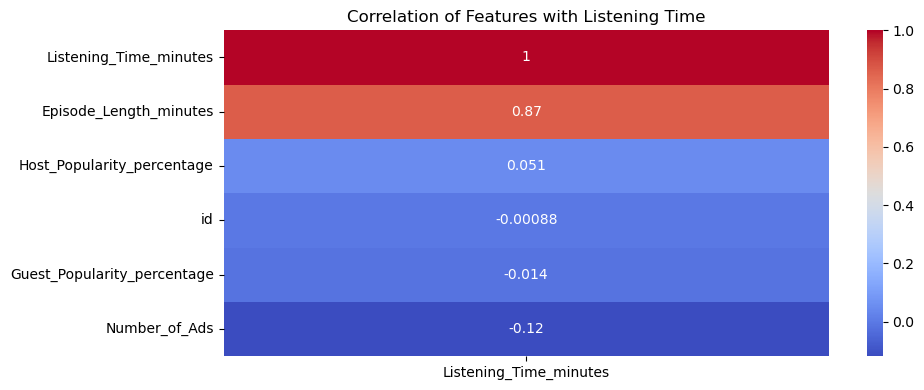

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = clean_train_df.corr(numeric_only=True)
plt.figure(figsize=(10,4))
sns.heatmap(corr[['Listening_Time_minutes']].sort_values(by='Listening_Time_minutes', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Listening Time')
plt.tight_layout()
plt.show()